1) Quantas séries e quantos filmes existem cadastrados?

2) Como está a distribuição do país de origem dos filmes? E das séries?

3) Como foi a distribuição da quantidade de lançamentos dentro da plataforma? Qual foi o ano que houveram mais lançamentos de filmes? E de séries?

4) A maior parte dos filmes da Netflix foram lançados em qual ano? E as séries?

5) Qual é a duração média dos filmes da Netflix?

6) A maioria das séries da Netflix tem quantas temporadas?

7) Qual é o diretor que mais aparece, quantas produções ele dirigiu? E somente entre filmes? E somente entre séries?

8) Média de duração de filmes por ano (saber se tem algum tipo de baixa na duração dos filmes com o passar dos anos)


Tratamento dos dados: 
- remoção dos registros que não continham data de inclusão na plataforma
- adição de coluna de mês de inclusão e ano de inclusão
- remoção das colunas date_added, description e rating

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

%matplotlib inline

In [68]:
df_netflix = pd.read_csv('./dados/netflix_titles.csv')
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [63]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [69]:
df_netflix = df_netflix[df_netflix['date_added'].notna()]
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8797 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8797 non-null   object
 1   type          8797 non-null   object
 2   title         8797 non-null   object
 3   director      6173 non-null   object
 4   cast          7972 non-null   object
 5   country       7967 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8797 non-null   int64 
 8   rating        8793 non-null   object
 9   duration      8794 non-null   object
 10  listed_in     8797 non-null   object
 11  description   8797 non-null   object
dtypes: int64(1), object(11)
memory usage: 893.4+ KB


In [70]:
df_netflix['month_added'] = df_netflix['date_added'].str.split(" ").str[0]
df_netflix['year_added'] = df_netflix['date_added'].str.split(",").str[1].str.strip()
df_netflix['year_added'] = df_netflix['year_added'].astype(int)
df_netflix = df_netflix.drop(columns={'date_added', 'description', 'rating'})
df_netflix.head()

,show_id,type,title,director,cast,country,release_year,duration,listed_in,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,90 min,Documentaries,September,2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,1 Season,"Crime TV Shows, International TV Shows, TV Act...",September,2021
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,1 Season,"Docuseries, Reality TV",September,2021
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",September,2021


In [72]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8797 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8797 non-null   object
 1   type          8797 non-null   object
 2   title         8797 non-null   object
 3   director      6173 non-null   object
 4   cast          7972 non-null   object
 5   country       7967 non-null   object
 6   release_year  8797 non-null   int64 
 7   duration      8794 non-null   object
 8   listed_in     8797 non-null   object
 9   month_added   8797 non-null   object
 10  year_added    8797 non-null   object
dtypes: int64(1), object(10)
memory usage: 824.7+ KB


In [39]:
df_netflix['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [150]:
df_movie = df_netflix[df_netflix['type']=='Movie']
df_movie.head()

,show_id,type,title,director,cast,country,release_year,duration,listed_in,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,90 min,Documentaries,September,2021
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021,91 min,Children & Family Movies,September,2021
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,125 min,"Dramas, Independent Movies, International Movies",September,2021
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,104 min,"Comedies, Dramas",September,2021
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021,127 min,"Dramas, International Movies",September,2021


In [152]:
df_show = df_netflix[df_netflix['type']=='TV Show']
df_show.head()

,show_id,type,title,director,cast,country,release_year,duration,listed_in,month_added,year_added
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,1 Season,"Crime TV Shows, International TV Shows, TV Act...",September,2021
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,1 Season,"Docuseries, Reality TV",September,2021
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",September,2021
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021,1 Season,"TV Dramas, TV Horror, TV Mysteries",September,2021


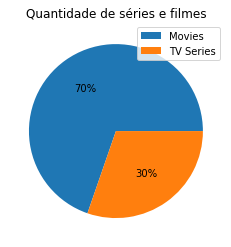

In [126]:
df_count = df_netflix['type'].value_counts()
plt.pie(df_count.values, data=df_count, autopct='%1.0f%%')
plt.legend(labels=['Movies', 'TV Series'])
plt.title('Quantidade de séries e filmes');

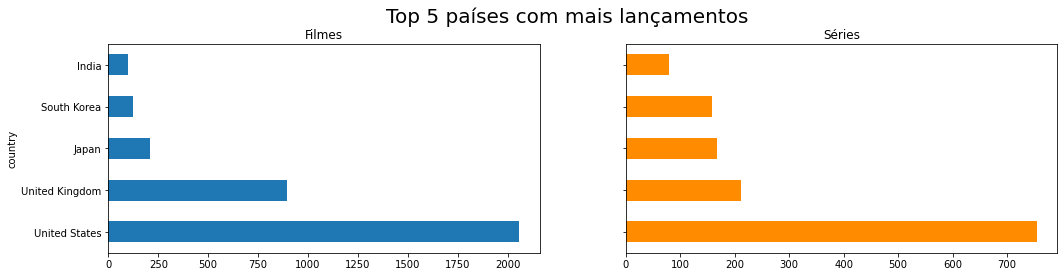

In [253]:
df_top_country_movies = df_movie.groupby('country')['title'].count().sort_values(ascending=False).head(5)
df_top_country_show = df_show.groupby('country')['title'].count().sort_values(ascending=False).head(5)

fig, axs = plt.subplots(1, 2, figsize=(17,4), sharey=True)

fig.suptitle('Top 5 países com mais lançamentos', fontsize=20)
fig.subplots_adjust(top=0.85)
df_top_country_movies.plot(kind='barh', x=df_top_country_movies.index, y=df_top_country_movies.values, title='Top 5 países com mais lançamentos de filmes', ax=axs[0]);
axs[0].set_title('Filmes')
df_top_country_show.plot(kind='barh', x=df_top_country_show.index, y=df_top_country_show.values, title='Top 5 países com mais lançamentos de séries', color='darkorange', ax=axs[1]);
axs[1].set_title('Séries');

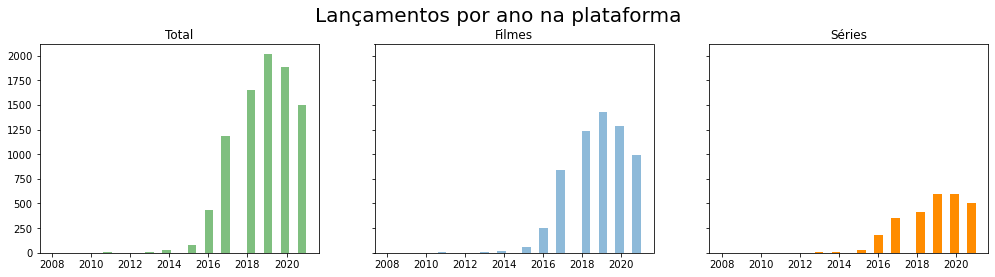

In [178]:
fig, axs = plt.subplots(1, 3, figsize=(17,4), sharey=True)

fig.suptitle('Lançamentos por ano na plataforma', fontsize=20)
fig.subplots_adjust(top=0.85)
axs[0].hist(df_netflix['year_added'], bins=30, alpha=0.5, color='green')
axs[0].set_title('Total')
axs[1].hist(df_movie['year_added'], bins=30, alpha=0.5)
axs[1].set_title('Filmes')
axs[2].hist(df_show['year_added'], bins=30, color='darkorange')
axs[2].set_title('Séries');

/Users/baumgarten/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/baumgarten/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Total')

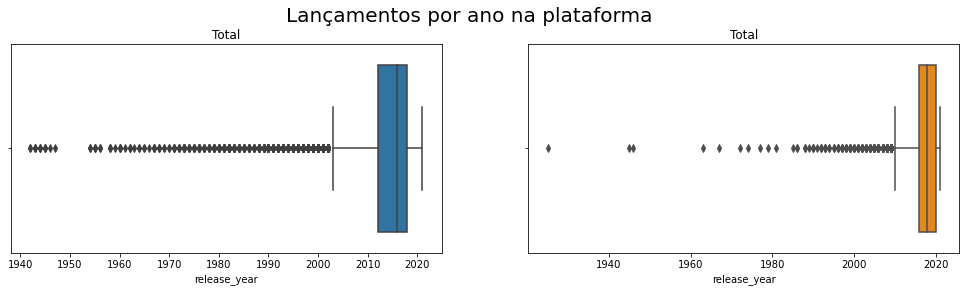

In [261]:
df_lancamentos_movie = df_movie['release_year'].value_counts().reset_index()
df_lancamentos_show = df_show['release_year'].value_counts().reset_index()

fig, ax = plt.subplots(1, 2, figsize=(17,4), sharey=True)

fig.suptitle('Lançamentos por ano na plataforma', fontsize=20)
fig.subplots_adjust(top=0.85)
ax[0] = sns.boxplot(df_movie['release_year'], ax=ax[0])
ax[0].set_title('Filmes')
ax[1] = sns.boxplot(df_show['release_year'], color='darkorange', ax=ax[1])
ax[1].set_title('Séries')

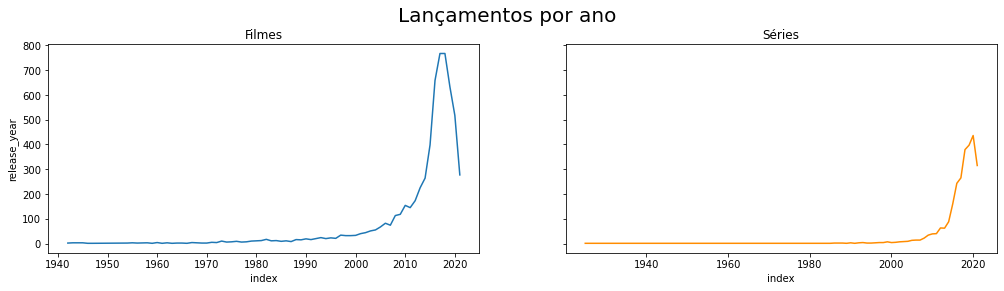

In [206]:
fig, ax = plt.subplots(1, 2, figsize=(17,4), sharey=True)

fig.suptitle('Lançamentos por ano', fontsize=20)
fig.subplots_adjust(top=0.85)
ax[0] = sns.lineplot(data=df_lancamentos_movie, x='index', y='release_year', ax=ax[0])
ax[0].set_title('Filmes')
ax[1] = sns.lineplot(data=df_lancamentos_show, x='index', y='release_year', color='darkorange', ax=ax[1])
ax[1].set_title('Séries');

In [266]:
df_movie['duration_minutes'] = df_movie['duration'].str.split(" ").str[0]
#df_movie.head()
df_movie = df_movie[df_movie['duration_minutes'].notna()]
df_movie['duration_minutes'] = df_movie['duration_minutes'].astype(int)
fig = px.histogram(data_frame=df_movie, x='duration_minutes', marginal='box')
fig.update_layout(title='Distribuição da duração dos filmes')

In [267]:
df_show['duration_season'] = df_show['duration'].str.split(" ").str[0]
#df_show.head()
df_show['duration_season'] = df_show['duration_season'].astype(int)
fig = px.histogram(data_frame=df_show, x='duration_season', marginal='box', color_discrete_sequence=['indianred'])
fig.update_layout(title='Distribuição da duração das séries')

/var/folders/gr/96w0ylzx3fxb6p7f3dpvgwwjz14vh3/T/ipykernel_18437/2484744760.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/gr/96w0ylzx3fxb6p7f3dpvgwwjz14vh3/T/ipykernel_18437/2484744760.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



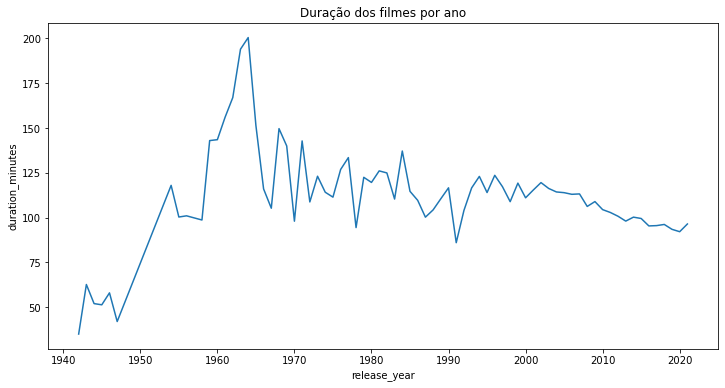

In [244]:
df_duration = df_movie.groupby('release_year').agg({'duration_minutes':'mean'}).reset_index()
plt.figure(figsize=(12,6))
plt.title('Duração dos filmes por ano')
sns.lineplot(data=df_duration, x='release_year', y='duration_minutes');

In [298]:
fig = px.scatter(data_frame=df_movie, x='duration_minutes', y='release_year')
fig.update_layout(title='Duração dos filmes por ano')

In [295]:
df_diretor = df_netflix.groupby(['director', 'type'])['title'].count().reset_index().sort_values(by='title', ascending=False).head(10)
fig = px.bar(df_diretor, x='director', y='title')
fig.update_layout(title='Top 10 diretores que mais dirigiram produções')